# Project 1
## Igor Balagula

For this project I created a dataset that lists all of the college friends of myself and my wife and our friend's children. Edges indicate close relationship between people. Any pair of people who cal call themselves friends are connected.

Data collection: I asked our friends to fill out a quick online survey where I listed all of our college friends and their children and asked everyone to check if they have a close relationship with all of the other people and consider them close friends.

The graph is loaded from a file in Pajek format and converted into a simple graph. The graph is non-directed. The categorial variable is gender.

The degree centrality and eigenvector centrality for each node are calculated.
One-way ANOWA is performed to see if there any statistical difference in centrality measures between male and female groups.

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from prettytable import PrettyTable
from scipy import stats

Load data from a pajek-formatted file

In [2]:
MG=nx.read_pajek("C:\\temp\\FRIENDS.NET")

Convert from Multigraph to Simple Graph

In [3]:
G=nx.Graph(MG)

Assign categorical variable Gender to each node. For some reason I was unable to load it from the pajek-formatted file.

In [4]:
nx.set_node_attributes(G, 'gender', {'Igor':'male','Ella':'female','Irene':'female','Saimon':'male','Ben':'male','Sofia':'female','Tatiana':'female','Ilya':'male','Art':'male',
                                     'Ari':'female','Greb':'male','Victoria':'female','Alexandra':'female','Nikita':'male','Yana':'female','Alla':'female','Mila':'female','Elena':'female',
                                     'Vika':'female','Ilona':'female','Arthur':'male','Ariella':'female','Boris':'male','Greg':'male','Ada':'female','Nina':'female','Alex':'male',
                                     'Stan':'male','Maria':'female'})
nx.set_node_attributes(G, 'person_type', {'Igor':'adult','Ella':'adult','Irene':'friend','Saimon':'friend','Ben':'friend_child','Sofia':'friend_child','Tatiana':'friend','Ilya':'friend','Art':'friend_child',
                                     'Ari':'friend_child','Greb':'friend','Victoria':'friend','Alexandra':'friend_child','Nikita':'friend_child','Yana':'friend_child','Alla':'friend','Mila':'friend','Elena':'friend',
                                     'Vika':'friend_child','Ilona':'child','Arthur':'child','Ariella':'friend_child','Boris':'friend','Greg':'friend_child','Ada':'friend_child','Nina':'friend','Alex':'friend',
                                     'Stan':'friend','Maria':'friend'})

Examine the nodes

In [5]:
print ("Number of nodes:")
print (G.number_of_nodes())
print ("Number of edges:")
print (G.number_of_edges())
#Examine nodes
print G.nodes(data=True)

Number of nodes:
29
Number of edges:
195
[(u'Tatiana', {'gender': 'female', 'id': u'7', 'person_type': 'friend'}), (u'Alla', {'gender': 'female', 'id': u'16', 'person_type': 'friend'}), (u'Ariella', {'gender': 'female', 'id': u'22', 'person_type': 'friend_child'}), (u'Ada', {'gender': 'female', 'id': u'25', 'person_type': 'friend_child'}), (u'Alex', {'gender': 'male', 'id': u'27', 'person_type': 'friend'}), (u'Boris', {'gender': 'male', 'id': u'23', 'person_type': 'friend'}), (u'Ella', {'gender': 'female', 'id': u'2', 'person_type': 'adult'}), (u'Victoria', {'gender': 'female', 'id': u'12', 'person_type': 'friend'}), (u'Stan', {'gender': 'male', 'id': u'28', 'person_type': 'friend'}), (u'Elena', {'gender': 'female', 'id': u'18', 'person_type': 'friend'}), (u'Maria', {'gender': 'female', 'id': u'29', 'person_type': 'friend'}), (u'Ben', {'gender': 'male', 'id': u'5', 'person_type': 'friend_child'}), (u'Mila', {'gender': 'female', 'id': u'17', 'person_type': 'friend'}), (u'Nina', {'gender

Display graph

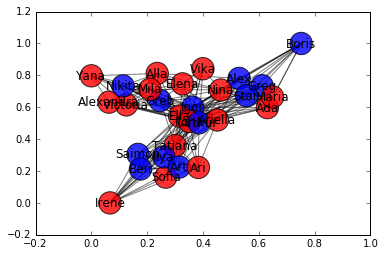

In [6]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=['Igor','Ella','Irene','Saimon','Ben','Sofia','Tatiana','Ilya','Art','Ari','Greb','Victoria','Alexandra','Nikita','Yana','Alla','Mila','Elena','Vika','Ilona','Arthur','Ariella','Boris','Greg','Ada','Nina','Alex','Stan','Maria'],node_color=['b','r','r','b','b','r','r','b','b','r','b','r','r','b','r','r','r','r','r','r','b','r','b','b','r','r','b','b','r'],node_size=500,alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G,pos)
plt.show()

Calculate degree centrality for each node

In [7]:
d_c=nx.degree_centrality(G)

Calculate eigenvector centrality for each node

In [8]:
d_c_s=sorted(d_c.iteritems(),key=lambda(u,v):(-v,u))

In [9]:
e_c = nx.eigenvector_centrality(G)
e_c_s = sorted(e_c.iteritems(), key = lambda(u,v):(-v,u))

names1=[x[0] for x in d_c_s]
names2=[x[0] for x in e_c_s]
names=list(set(names1)|set(names2))

table=[[name,G.node[name]['person_type'],G.degree(name),round(d_c[name],4),round(e_c[name],4),G.node[name]['gender']] for name in names]

table=sorted(table,key=lambda x: -x[3])
t = PrettyTable(['Node','Person_Type', 'Degree','Degree Centrality','Eigen Centrality','Gender'])
for i in range(0, len(table)):
    t.add_row(table[i])
    
print t

+-----------+--------------+--------+-------------------+------------------+--------+
|    Node   | Person_Type  | Degree | Degree Centrality | Eigen Centrality | Gender |
+-----------+--------------+--------+-------------------+------------------+--------+
|    Ella   |    adult     |   28   |        1.0        |      0.314       | female |
|   Arthur  |    child     |   26   |       0.9286      |      0.3003      |  male  |
|   Ilona   |    child     |   26   |       0.9286      |      0.3003      | female |
|    Igor   |    adult     |   23   |       0.8214      |      0.2751      |  male  |
|  Ariella  | friend_child |   20   |       0.7143      |      0.2544      | female |
|    Nina   |    friend    |   17   |       0.6071      |      0.2225      | female |
|  Tatiana  |    friend    |   14   |        0.5        |      0.1888      | female |
|    Greb   |    friend    |   14   |        0.5        |      0.1853      |  male  |
|    Mila   |    friend    |   13   |       0.4643    

As expected myself (Igor), my wife (Ella) and our children (Arthur, Ilona) have the highest degree centrality. I was surprised to see that our children have a degree centrality higher than mine. Children of our friends have the lowest degree centrality since many of them don't meet each other very often.

In [10]:
male=[]
female=[]
for i,j in G.nodes_iter(data=True):
    if j['gender']=='male':
        male.append(i)
    elif j['gender']=='female':
        female.append(i)

G_male= G.subgraph(male)
G_female= G.subgraph(female)


# Centrality
d_c_m=nx.degree_centrality(G_male)
e_c_m=nx.eigenvector_centrality(nx.Graph(G_male))

d_c_f=nx.degree_centrality(G_female)
e_c_f=nx.eigenvector_centrality(nx.Graph(G_female))

dcm=[]
dcf=[]

for key, value in d_c_m.items():
    dcm.append(value)
    
for key, value in d_c_f.items():
    dcf.append(value)

  
      
f_val, p_val = stats.f_oneway(dcm, dcf)  
  
print "One-way ANOVA P =", p_val


print (stats.ttest_ind(dcm, dcf)) # male vs. female - no significant difference

One-way ANOVA P = 0.852805300141
Ttest_indResult(statistic=0.18732644659904304, pvalue=0.85280530014127098)


We found that there is no statistically significant difference in degree centrality between male and female groups 